# Project: Crime Rate Prediction

---

## Table of Contents
1. Introduction
2. Data Wrangling
3. Exploratory Data Analysis
4. Conclusions





---



---




# 1. Introduction


## Overview
This dataset contains information about 862,905 crimes that occured in various areas in Los Angeles, USA from 2020 till december 2023 and was collected on the basis of LAPD radio comms and investigation done by them after the crime is reported. It includes 20 columns which includes information on areas such as - Record Number, Date and time at which crime was reported/occurred, Victim Age, Sex, & Ethnicity, Location where the crime took place, Weapon of crime.... etc.



---

## Questions
1-Top 5 Regions with the Most Crimes

2- Are there any specific days of the week or months that show higher crime rates?

3- Which areas within Los Angeles experience the highest number of specific types of crimes, such as theft or assault?

4- What is the distribution of crime types in different neighborhoods?

5- How do crime rates compare across various victim demographics (age and gender)?

6- Can we identify any trends in crime rates over the years provided in the dataset?

7- Is there a relationship between the type of weapon used and the location or time of the crime?

8- What are the most common crime codes reported, and can we associate them with other factors like time, location, or victim profile?

9- Can we predict future crime hotspots based on historical data of crime locations?

10- Can we predict the unkown gender of the victims using our known gender crime cases?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from datetime  import datetime
import seaborn as sea
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline




---



---



---



#2. Data Wrangling
In this section, we will review the data, extract a representative sample to work on, then clean and edit it for analysis.



---





## 2.1 Data Gathering

In [ ]:
#Load the dataset as a dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Crime_Data_from_2020_to_Present_20231230.csv')
df

DR_NO               Date Rptd                DATE OCC  TIME OCC  \
0        10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230   
1       190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330   
2       191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730   
3       191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415   
4       200100501  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM        30   
...           ...                     ...                     ...       ...   
862901  231606525  03/22/2023 12:00:00 AM  03/22/2023 12:00:00 AM      1000   
862902  231210064  04/12/2023 12:00:00 AM  04/12/2023 12:00:00 AM      1630   
862903  230115220  07/02/2023 12:00:00 AM  07/01/2023 12:00:00 AM         1   
862904  230906458  03/05/2023 12:00:00 AM  03/05/2023 12:00:00 AM       900   
862905  230319786  11/10/2023 12:00:00 AM  11/09/2023 12:00:00 AM      2300   

        AREA    AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0          3    Southwest          377         2     624   
1          1      Central          163         2     624   
2         15  N Hollywood         1543         2     745   
3         19      Mission         1998         2     740   
4          1      Central          163         1     121   
...      ...          ...          ...       ...     ...   
862901    16     Foothill         1602         1     230   
862902    12  77th Street         1239         1     230   
862903     1      Central          154         1     352   
862904     9     Van Nuys          914         2     745   
862905     3    Southwest          395         1     331   

                                              Crm Cd Desc  ... Status  \
0                                BATTERY - SIMPLE ASSAULT  ...     AO   
1                                BATTERY - SIMPLE ASSAULT  ...     IC   
2                VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC   
3       VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC   
4                                          RAPE, FORCIBLE  ...     IC   
...                                                   ...  ...    ...   
862901     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...     IC   
862902     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...     IC   
862903                                         PICKPOCKET  ...     IC   
862904           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC   
862905  THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...  ...     IC   

        Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0       Adult Other    624.0      NaN       NaN      NaN   
1       Invest Cont    624.0      NaN       NaN      NaN   
2       Invest Cont    745.0    998.0       NaN      NaN   
3       Invest Cont    740.0      NaN       NaN      NaN   
4       Invest Cont    121.0    998.0       NaN      NaN   
...             ...      ...      ...       ...      ...   
862901  Invest Cont    230.0      NaN       NaN      NaN   
862902  Invest Cont    230.0      NaN       NaN      NaN   
862903  Invest Cont    352.0      NaN       NaN      NaN   
862904  Invest Cont    745.0      NaN       NaN      NaN   
862905  Invest Cont    331.0      NaN       NaN      NaN   

                                        LOCATION Cross Street      LAT  \
0        1100 W  39TH                         PL          NaN  34.0141   
1         700 S  HILL                         ST          NaN  34.0459   
2        5400    CORTEEN                      PL          NaN  34.1685   
3       14400    TITUS                        ST          NaN  34.2198   
4                                700 S  BROADWAY          NaN  34.0452   
...                                          ...          ...      ...   
862901  12800    FILMORE                      ST          NaN  34.2790   
862902   6100 S  VERMONT                      AV          NaN  33.9841   
862903    500 S  MAIN                         ST          NaN  34.0467   
8629

In [ ]:
# Display a summary of relevant information about the sample dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862906 entries, 0 to 862905
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           862906 non-null  int64  
 1   Date Rptd       862906 non-null  object 
 2   DATE OCC        862906 non-null  object 
 3   TIME OCC        862906 non-null  int64  
 4   AREA            862906 non-null  int64  
 5   AREA NAME       862906 non-null  object 
 6   Rpt Dist No     862906 non-null  int64  
 7   Part 1-2        862906 non-null  int64  
 8   Crm Cd          862906 non-null  int64  
 9   Crm Cd Desc     862906 non-null  object 
 10  Mocodes         749241 non-null  object 
 11  Vict Age        862906 non-null  int64  
 12  Vict Sex        757597 non-null  object 
 13  Vict Descent    757584 non-null  object 
 14  Premis Cd       862886 non-null  float64
 15  Premis Desc     862398 non-null  object 
 16  Weapon Used Cd  299647 non-null  float64
 17  Weapon Des

In [ ]:
# Shape of whole dataframe
df.shape

(862906, 28)

In [ ]:
# Extracting a sample to work on using stratified sampling based on 'AREA' column

# Defining area intervals
areas = df['AREA'].unique()
num_areas = len(areas)

num_areas

21

In [ ]:
# Creating groups
area_groups = {}

for i, area in enumerate(areas):
    area_groups[f'G{i+1}'] = df[df['AREA'] == area]

In [ ]:
#count in each group
groups = {f'G{i+1}': len(area_groups[f'G{i+1}']) for i in range(num_areas)}
groups_df = pd.DataFrame(groups.values(), columns=['count'], index=groups.keys())

print("Counts in each group:")
print(groups_df)

Counts in each group:
     count
G1   48036
G2   57483
G3   44632
G4   38528
G5   40165
G6   54062
G7   36365
G8   32074
G9   35176
G10  44921
G11  33568
G12  48665
G13  40589
G14  37039
G15  36495
G16  35637
G17  28200
G18  38326
G19  43076
G20  38191
G21  51678


In [ ]:
# Defineing the sample size and calculating sample counts for each group
sample_size = 10000
total = len(df)
sample_percentage = round(sample_size / total, 3)

sample_counts = {f'S{i+1}': round(sample_percentage * len(area_groups[f'G{i+1}'])) for i in range(num_areas)}

In [ ]:
# Displaying the sample counts in each group
samples_df = pd.DataFrame(sample_counts.values(), columns=['count'], index=sample_counts.keys())

print("\nSample counts in each group:")
print(samples_df)


Sample counts in each group:
     count
S1     576
S2     690
S3     536
S4     462
S5     482
S6     649
S7     436
S8     385
S9     422
S10    539
S11    403
S12    584
S13    487
S14    444
S15    438
S16    428
S17    338
S18    460
S19    517
S20    458
S21    620


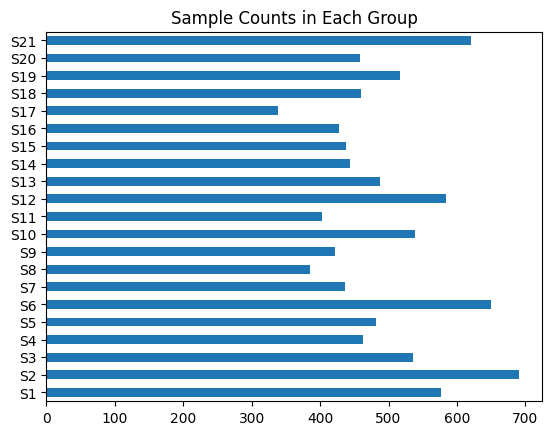

In [ ]:
# Plotting the sample counts
samples_df.plot(kind='barh', legend=False, title='Sample Counts in Each Group');

In [ ]:
#creatig the sampled dataframe
sampled_df = pd.DataFrame()

for i in range(num_areas):
    group_name = f'G{i+1}'
    group_size = round(sample_percentage * len(area_groups[group_name]))

    sampled_group = area_groups[group_name].sample(n=group_size, random_state=42)
    sampled_df = pd.concat([sampled_df, sampled_group])

In [ ]:
sampled_df.head()

DR_NO               Date Rptd                DATE OCC  TIME OCC  \
150067  120322998  10/16/2012 12:00:00 AM  11/09/2011 12:00:00 AM      1200   
278359  170306578  02/09/2016 12:00:00 AM  02/09/2016 12:00:00 AM      2330   
460141  220315019  08/12/2022 12:00:00 AM  08/06/2022 12:00:00 AM      1510   
17841   200313332  06/28/2020 12:00:00 AM  06/27/2020 12:00:00 AM      1600   
558687  220321670  12/11/2022 12:00:00 AM  12/10/2022 12:00:00 AM      2225   

        AREA  AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
150067     3  Southwest          355         2     668   
278359     3  Southwest          326         2     740   
460141     3  Southwest          334         2     354   
17841      3  Southwest          373         2     664   
558687     3  Southwest          316         1     210   

                                              Crm Cd Desc  ... Status  \
150067         EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)  ...     IC   
278359  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     AA   
460141                                  THEFT OF IDENTITY  ...     IC   
17841                                  BUNCO, PETTY THEFT  ...     IC   
558687                                            ROBBERY  ...     AA   

         Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
150067   Invest Cont    668.0      NaN       NaN      NaN   
278359  Adult Arrest    740.0      NaN       NaN      NaN   
460141   Invest Cont    354.0      NaN       NaN      NaN   
17841    Invest Cont    664.0      NaN       NaN      NaN   
558687  Adult Arrest    210.0    998.0       NaN      NaN   

                                       LOCATION Cross Street      LAT  \
150067  3500 S  WESTERN                      AV          NaN  34.0247   
278359  1700 W  ADAMS                        BL          NaN  34.0327   
460141  4200 W  MONT CLAIR                   ST          NaN  34.0313   
17841   3600 S  NORTON                       AV          NaN  34.0182   
558687  1900 W  ADAMS                        BL          NaN  34.0349   

             LON  
150067 -118.3089  
278359 -118.3002  
460141 -118.3316  
17841  -118.3329  
558687 -118.3046  

[5 rows x 28 columns]



---





## 2.2 Data Assessment

In [ ]:
#Check the range of numerical columns
sampled_df.describe()

DR_NO      TIME OCC          AREA   Rpt Dist No      Part 1-2  \
count  1.035400e+04  10354.000000  10354.000000  10354.000000  10354.000000   
mean   1.964604e+08   1344.398783     10.859764   1132.503767      1.427468   
std    4.555677e+07    651.180940      6.138068    613.022540      0.494735   
min    1.007182e+08      1.000000      1.000000    101.000000      1.000000   
25%    1.620150e+08    900.000000      6.000000    625.000000      1.000000   
50%    2.201170e+08   1420.000000     11.000000   1158.000000      1.000000   
75%    2.311111e+08   1900.000000     16.000000   1656.000000      2.000000   
max    2.321179e+08   2359.000000     21.000000   2197.000000      2.000000   

             Crm Cd      Vict Age     Premis Cd  Weapon Used Cd      Crm Cd 1  \
count  10354.000000  10354.000000  10354.000000     3616.000000  10354.000000   
mean     504.175681     29.758258    313.872996      361.675055    503.842766   
std      209.703056     21.407175    218.601619      122.791036    209.562642   
min      110.000000     -4.000000    101.000000      101.000000    110.000000   
25%      330.000000     13.000000    102.000000      308.000000    330.000000   
50%      442.000000     30.000000    210.000000      400.000000    442.000000   
75%      626.000000     45.000000    501.000000      400.000000    626.000000   
max      956.000000     99.000000    972.000000      515.000000    956.000000   

         Crm Cd 2    Crm Cd 3  Crm Cd 4           LAT           LON  
count  692.000000   11.000000       0.0  10354.000000  10354.000000  
mean   950.552023  943.090909       NaN     34.034516   -118.216652  
std    126.773869  103.781939       NaN      1.164824      4.028445  
min    220.000000  740.000000       NaN      0.000000   -118.666700  
25%    998.000000  954.000000       NaN     34.010900   -118.430575  
50%    998.000000  998.000000       NaN     34.057800   -118.319200  
75%    998.000000  998.000000       NaN     34.166700   -118.273800  
max    999.000000  998.000000       NaN     34.327600      0.000000

In [ ]:
# Display the shape of the sample dataframe
sampled_df.shape

(10354, 28)

In [ ]:
# Check for missing data written as 0
def Check_Zeros(column):
  num = len(sampled_df[column==0])
  return num

In [ ]:
# Displaying count of zero cells in numerical columns
Numerical_Col = ['AREA','Rpt Dist No', 'Crm Cd', 'Vict Age', 'Weapon Used Cd','LAT','LON','TIME OCC','Part 1-2','Premis Cd','Crm Cd 1','Crm Cd 2','Crm Cd 3','Crm Cd 4']

for column in Numerical_Col:
  print(f'Number of 0 filled cells in {column} is {Check_Zeros(sampled_df[column])}')

Number of 0 filled cells in AREA is 0
Number of 0 filled cells in Rpt Dist No is 0
Number of 0 filled cells in Crm Cd is 0
Number of 0 filled cells in Vict Age is 2409
Number of 0 filled cells in Weapon Used Cd is 0
Number of 0 filled cells in LAT is 12
Number of 0 filled cells in LON is 12
Number of 0 filled cells in TIME OCC is 0
Number of 0 filled cells in Part 1-2 is 0
Number of 0 filled cells in Premis Cd is 0
Number of 0 filled cells in Crm Cd 1 is 0
Number of 0 filled cells in Crm Cd 2 is 0
Number of 0 filled cells in Crm Cd 3 is 0
Number of 0 filled cells in Crm Cd 4 is 0


In [ ]:
#Checking for null values
sampled_df.isnull().sum()

DR_NO                 0
Date Rptd             0
DATE OCC              0
TIME OCC              0
AREA                  0
AREA NAME             0
Rpt Dist No           0
Part 1-2              0
Crm Cd                0
Crm Cd Desc           0
Mocodes            1365
Vict Age              0
Vict Sex           1257
Vict Descent       1258
Premis Cd             0
Premis Desc           8
Weapon Used Cd     6738
Weapon Desc        6738
Status                0
Status Desc           0
Crm Cd 1              0
Crm Cd 2           9662
Crm Cd 3          10343
Crm Cd 4          10354
LOCATION              0
Cross Street       8714
LAT                   0
LON                   0
dtype: int64

In [ ]:
#Checking for duplicates
sampled_df.duplicated().sum()

15

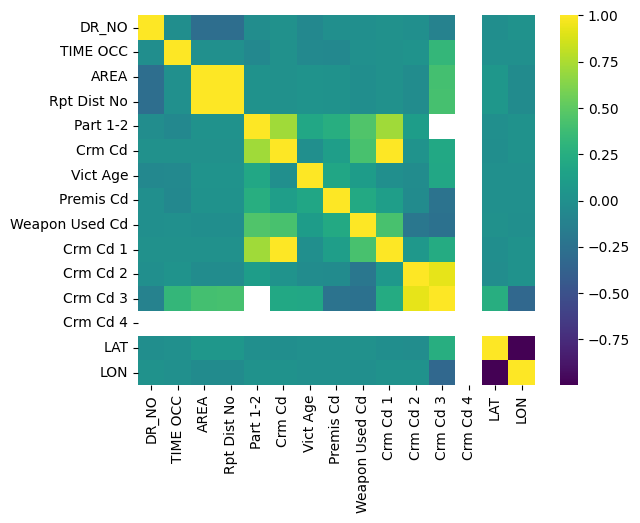

In [ ]:
# Plotting a heat map of the sample
sea.heatmap(sampled_df.corr(numeric_only=True), cmap='viridis');

In [ ]:
# Checking exact correlation
sampled_df.corr(numeric_only=True)

DR_NO  TIME OCC      AREA  Rpt Dist No  Part 1-2    Crm Cd  \
DR_NO           1.000000 -0.016697 -0.281610    -0.281545 -0.028940  0.009212   
TIME OCC       -0.016697  1.000000 -0.005343    -0.005523 -0.068147  0.006870   
AREA           -0.281610 -0.005343  1.000000     0.999078  0.019392  0.007738   
Rpt Dist No    -0.281545 -0.005523  0.999078     1.000000  0.019304  0.007153   
Part 1-2       -0.028940 -0.068147  0.019392     0.019304  1.000000  0.713102   
Crm Cd          0.009212  0.006870  0.007738     0.007153  0.713102  1.000000   
Vict Age       -0.062849 -0.056867  0.025941     0.026178  0.191468 -0.013802   
Premis Cd      -0.013249 -0.067510  0.012364     0.012670  0.251861  0.113784   
Weapon Used Cd -0.006147 -0.004650 -0.019169    -0.019510  0.447562  0.417833   
Crm Cd 1        0.009016  0.006638  0.007456     0.006845  0.713298  0.999243   
Crm Cd 2       -0.007044  0.025911 -0.033795    -0.035288  0.110443  0.028054   
Crm Cd 3       -0.111110  0.323524  0.403716     0.412695       NaN  0.202395   
Crm Cd 4             NaN       NaN       NaN          NaN       NaN       NaN   
LAT            -0.021402  0.000540  0.061208     0.061360 -0.010169 -0.020203   
LON             0.013728  0.001560 -0.041222    -0.041600  0.010533  0.019957   

                Vict Age  Premis Cd  Weapon Used Cd  Crm Cd 1  Crm Cd 2  \
DR_NO          -0.062849  -0.013249       -0.006147  0.009016 -0.007044   
TIME OCC       -0.056867  -0.067510       -0.004650  0.006638  0.025911   
AREA            0.025941   0.012364       -0.019169  0.007456 -0.033795   
Rpt Dist No     0.026178   0.012670       -0.019510  0.006845 -0.035288   
Part 1-2        0.191468   0.251861        0.447562  0.713298  0.110443   
Crm Cd         -0.013802   0.113784        0.417833  0.999243  0.028054   
Vict Age        1.000000   0.182734        0.099457 -0.013685 -0.032240   
Premis Cd       0.182734   1.000000        0.206235  0.113844 -0.037690   
Weapon Used Cd  0.099457   0.206235        1.000000  0.417911 -0.207389   
Crm Cd 1       -0.013685   0.113844        0.417911  1.000000  0.067836   
Crm Cd 2       -0.032240  -0.037690       -0.207389  0.067836  1.000000   
Crm Cd 3        0.195285  -0.233567       -0.247962  0.222665  0.924793   
Crm Cd 4             NaN        NaN             NaN       NaN       NaN   
LAT             0.000686   0.000185        0.009080 -0.020323 -0.025323   
LON             0.000835   0.000765       -0.007409  0.020043  0.025034   

                Crm Cd 3  Crm Cd 4       LAT       LON  
DR_NO          -0.111110       NaN -0.021402  0.013728  
TIME OCC        0.323524       NaN  0.000540  0.001560  
AREA            0.403716       NaN  0.061208 -0.041222  
Rpt Dist No     0.412695       NaN  0.061360 -0.041600  
Part 1-2             NaN       NaN -0.010169  0.010533  
Crm Cd          0.202395       NaN -0.020203  0.019957  
Vict Age        0.195285       NaN  0.000686  0.000835  
Premis Cd      -0.233567       NaN  0.000185  0.000765  
Weapon Used Cd -0.247962       NaN  0.009080 -0.007409  
Crm Cd 1        0.222665       NaN -0.020323  0.020043  
Crm Cd 2        0.924793       NaN -0.025323  0.025034  
Crm Cd 3        1.000000       NaN  0.255332 -0.330409  
Crm Cd 4             NaN       NaN       NaN       NaN  
LAT             0.255332       NaN  1.000000 -0.996472  
LON            -0.330409       NaN -0.996472  1.000000

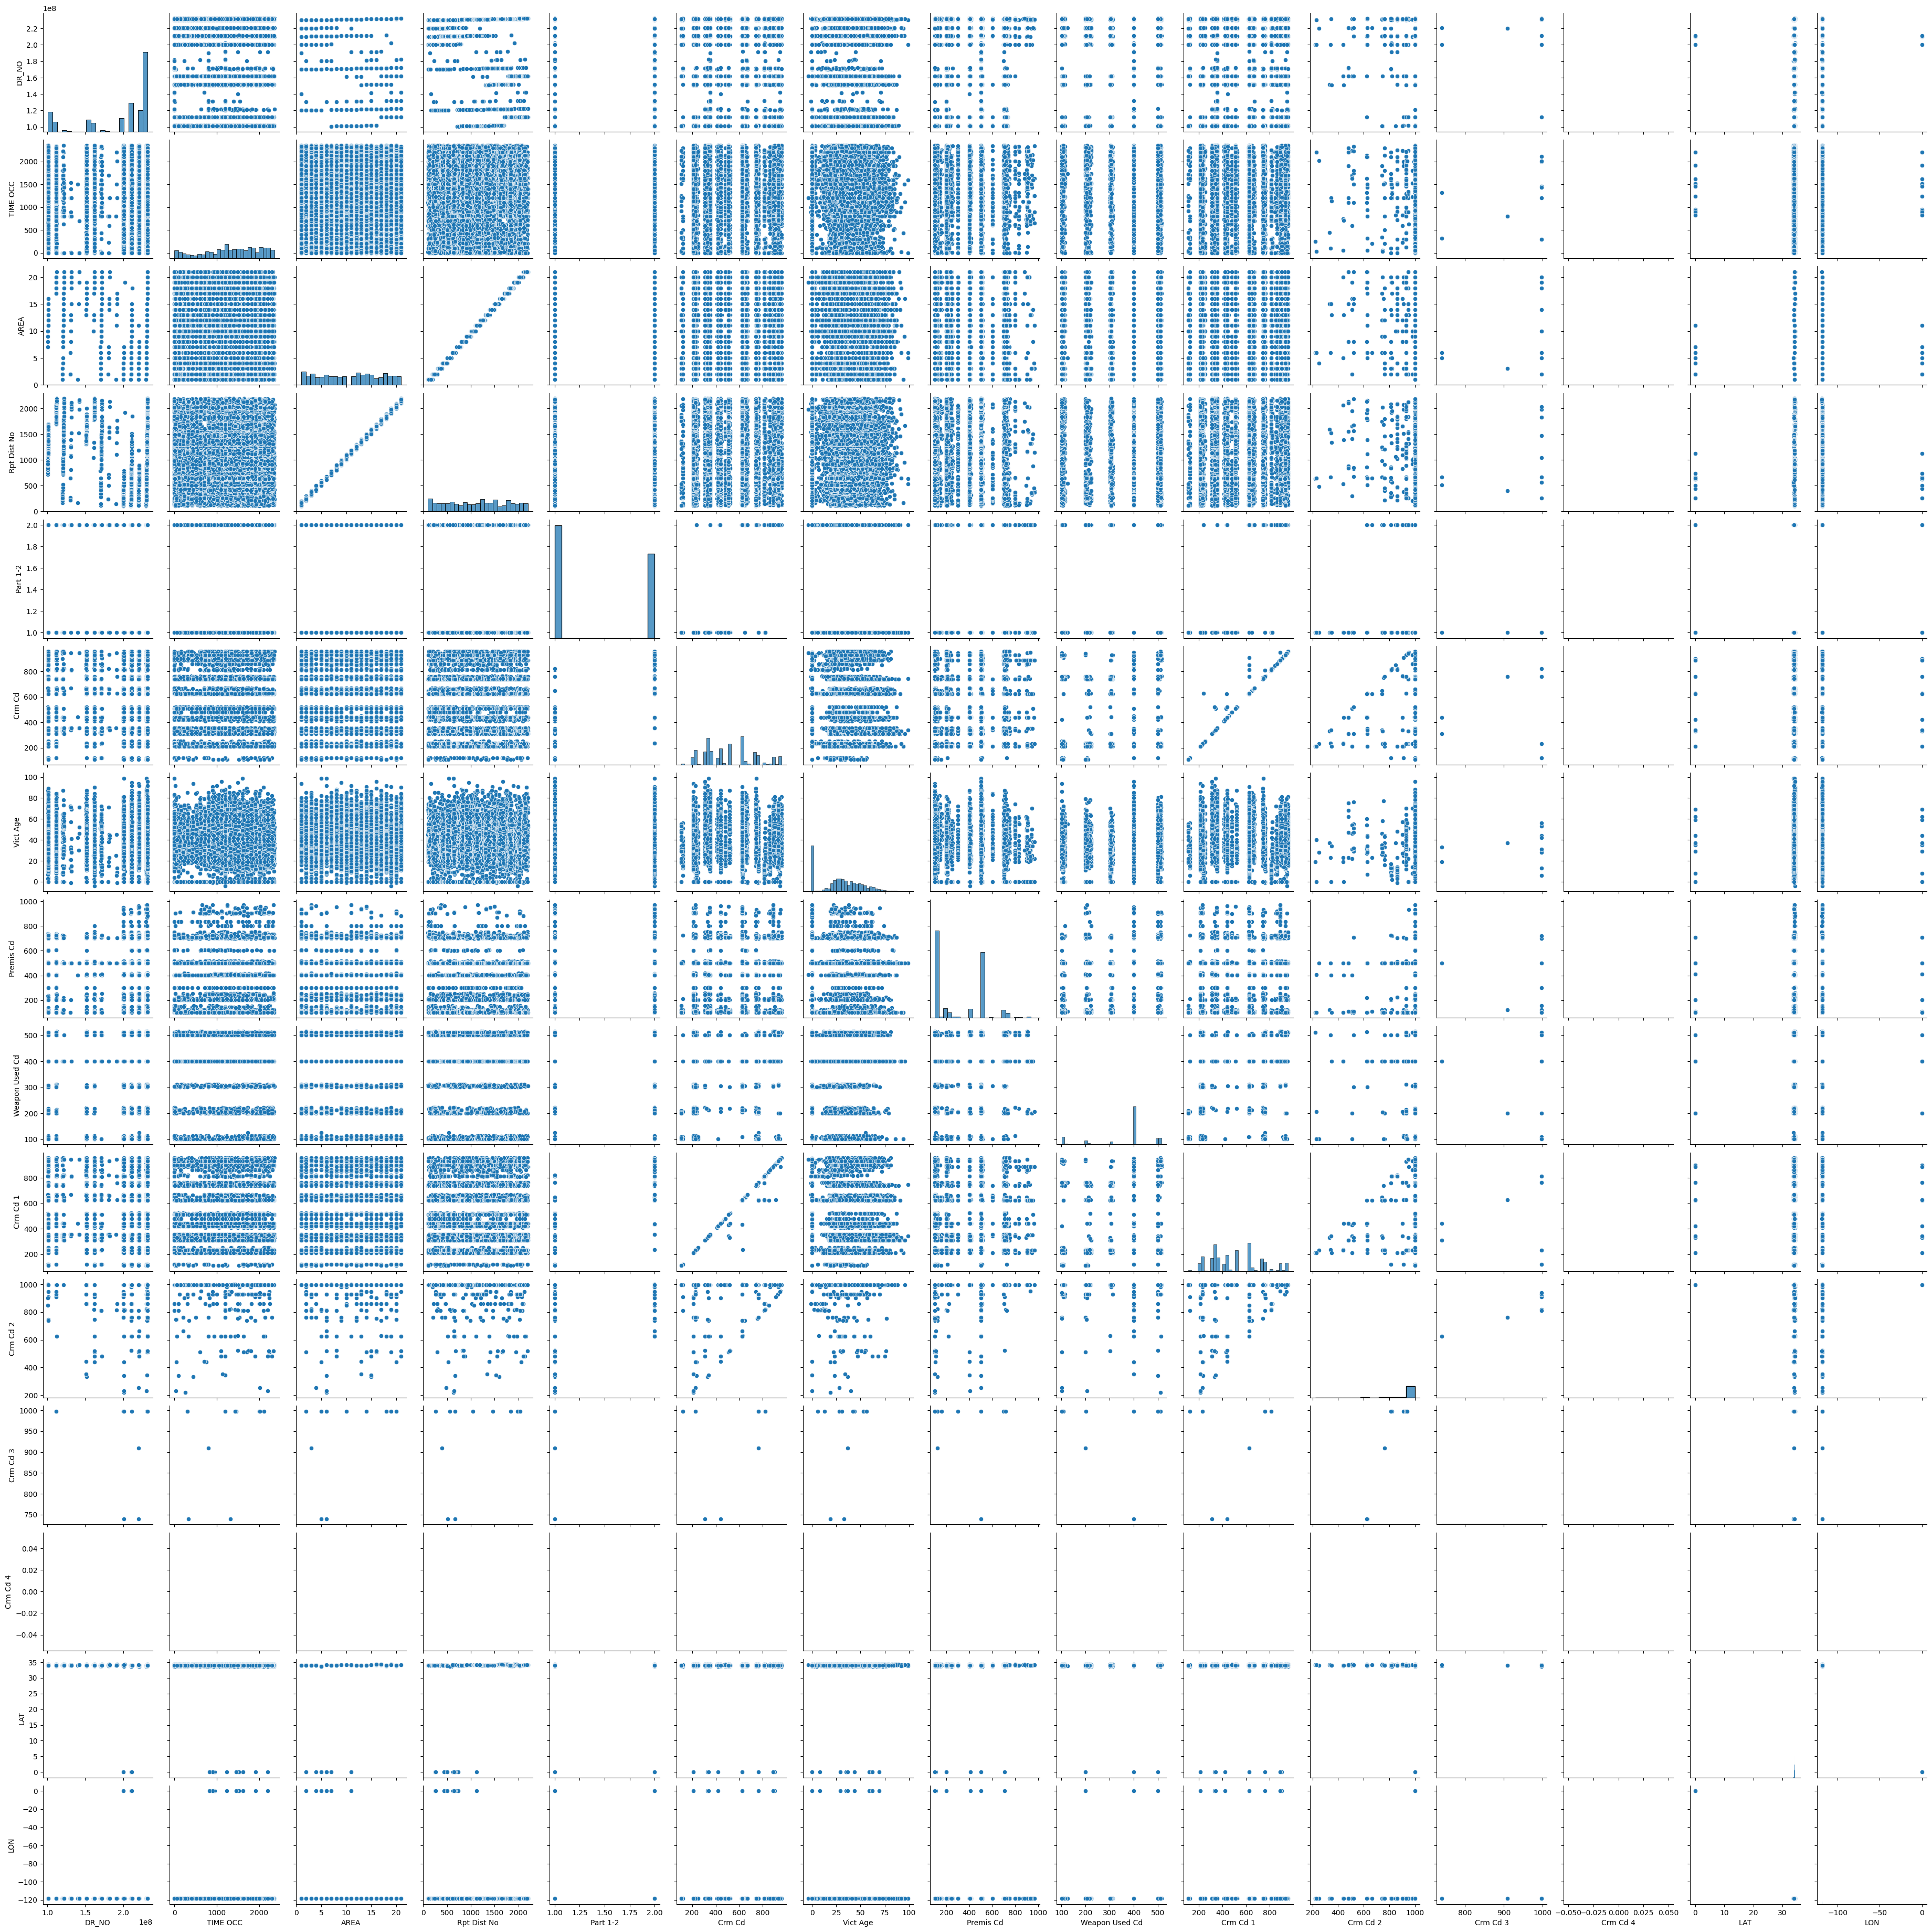

In [ ]:
sea.pairplot(sampled_df);



---




## 2.3 Data Cleaning
1. Removing unnecessary columns 'DR_NO','Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4','Status','Cross Street', 'Rpt Dist No'
2. Replacing zero with NAN in 'Vict Age', 'LAT', 'LON' columns
3. Replacing missing values in 'Mocodes', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Vict Age', 'LAT', 'LON'
4. Changing 'Date Rptd', 'DATE OCC', 'TIME OCC' columns to date format
5. Removing the duplicated values

In [ ]:
# Making a copy of the sample
sampled_clean = sampled_df.copy()

2.3.1 Removing unnecessary columns

In [ ]:
#Removing columns
sampled_clean = sampled_clean.drop(['DR_NO','Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4','Status','Cross Street', 'Rpt Dist No'], axis=1)

In [ ]:
# Checking if removed correctly
sampled_clean.head()

Date Rptd                DATE OCC  TIME OCC  AREA  \
150067  10/16/2012 12:00:00 AM  11/09/2011 12:00:00 AM      1200     3   
278359  02/09/2016 12:00:00 AM  02/09/2016 12:00:00 AM      2330     3   
460141  08/12/2022 12:00:00 AM  08/06/2022 12:00:00 AM      1510     3   
17841   06/28/2020 12:00:00 AM  06/27/2020 12:00:00 AM      1600     3   
558687  12/11/2022 12:00:00 AM  12/10/2022 12:00:00 AM      2225     3   

        AREA NAME  Part 1-2  Crm Cd  \
150067  Southwest         2     668   
278359  Southwest         2     740   
460141  Southwest         2     354   
17841   Southwest         2     664   
558687  Southwest         1     210   

                                              Crm Cd Desc  \
150067         EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)   
278359  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...   
460141                                  THEFT OF IDENTITY   
17841                                  BUNCO, PETTY THEFT   
558687                                            ROBBERY   

                                                  Mocodes  Vict Age Vict Sex  \
150067                                                NaN         0      NaN   
278359                           0311 1402 0906 1816 0329        15        X   
460141                                          1822 0100        41        M   
17841                                                0701        52        M   
558687  1419 1407 1402 0334 0355 0344 0913 2018 0302 0342        21        X   

       Vict Descent  Premis Cd             Premis Desc  Weapon Used Cd  \
150067          NaN      203.0          OTHER BUSINESS             NaN   
278359            X      203.0          OTHER BUSINESS             NaN   
460141            W      501.0  SINGLE FAMILY DWELLING             NaN   
17841             C      501.0  SINGLE FAMILY DWELLING             NaN   
558687            X      418.0                     NaN           109.0   

                  Weapon Desc   Status Desc  \
150067                    NaN   Invest Cont   
278359                    NaN  Adult Arrest   
460141                    NaN   Invest Cont   
17841                     NaN   Invest Cont   
558687  SEMI-AUTOMATIC PISTOL  Adult Arrest   

                                       LOCATION      LAT       LON  
150067  3500 S  WESTERN                      AV  34.0247 -118.3089  
278359  1700 W  ADAMS                        BL  34.0327 -118.3002  
460141  4200 W  MONT CLAIR                   ST  34.0313 -118.3316  
17841   3600 S  NORTON                       AV  34.0182 -118.3329  
558687  1900 W  ADAMS                        BL  34.0349 -118.3046

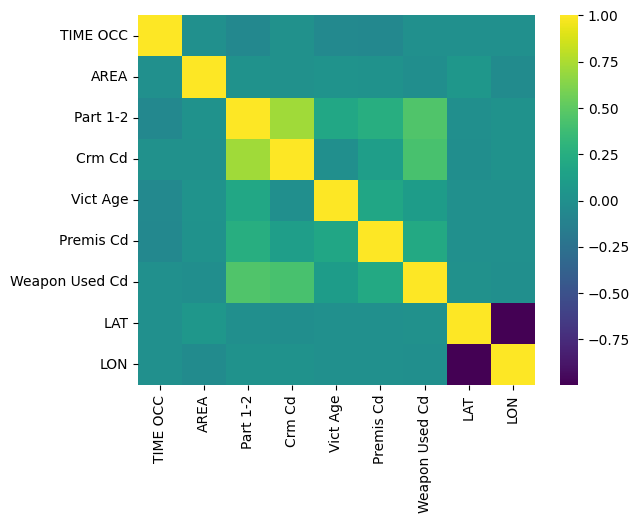

In [ ]:
#Checking heatmap again
sea.heatmap(sampled_clean.corr(numeric_only=True), cmap='viridis');

2.3.2 Replacing zero with NAN in 'Vict Age', 'LAT', 'LON' columns

In [ ]:
# Replacing with NAN
Zero_Col = ['Vict Age', 'LAT', 'LON']
sampled_clean[Zero_Col] = sampled_clean[Zero_Col].replace(0, np.NAN)

In [ ]:
# Checking if replaced correctly
for column in Zero_Col:
  print(f'Number of 0 filled cells in {column} is {Check_Zeros(sampled_clean[column])}')

Number of 0 filled cells in Vict Age is 0
Number of 0 filled cells in LAT is 0
Number of 0 filled cells in LON is 0


2.3.3 Removing missing values in 'Mocodes', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Vict Age', 'LAT', 'LON'

In [ ]:
#Creating two lists with the missing values columns of numerical and categorical features respectively
Null_Col_num = ['Weapon Used Cd', 'Vict Age', 'LAT', 'LON'] #replace the numerical columns with the mean
Null_Col_cat = ['Mocodes', 'Vict Sex', 'Vict Descent', 'Premis Desc', 'Weapon Desc'] #replace the categorical columns with the mode


In [ ]:
#Replacing null numerical features
for col in Null_Col_num:
    sampled_clean[col] = sampled_clean[col].fillna(sampled_clean[col].mean())
sampled_clean.isna().sum()

Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA                 0
AREA NAME            0
Part 1-2             0
Crm Cd               0
Crm Cd Desc          0
Mocodes           1365
Vict Age             0
Vict Sex          1257
Vict Descent      1258
Premis Cd            0
Premis Desc          8
Weapon Used Cd       0
Weapon Desc       6738
Status Desc          0
LOCATION             0
LAT                  0
LON                  0
dtype: int64

In [ ]:
# Replacing null categorical features
for col in Null_Col_cat:
    sampled_clean[col] = sampled_clean[col].fillna(sampled_clean[col].mode().values[0]) #'.values[0]' so the fillna function actually works
sampled_clean.isna().sum()

Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Part 1-2          0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status Desc       0
LOCATION          0
LAT               0
LON               0
dtype: int64

2.3.4 Changing 'DATE OCC' and 'TIME OCC' columns to date format

In [ ]:
sampled_clean['TIME OCC'] = sampled_clean['TIME OCC'].astype(str)
sampled_clean['TIME OCC'] = pd.to_datetime(sampled_clean['TIME OCC'], unit = 's')

In [ ]:
sampled_clean['DATE OCC'] = pd.to_datetime(sampled_clean['DATE OCC'])

In [ ]:
sampled_clean['Date Rptd'] = pd.to_datetime(sampled_clean['Date Rptd'])

In [ ]:
sampled_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10354 entries, 150067 to 565079
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date Rptd       10354 non-null  datetime64[ns]
 1   DATE OCC        10354 non-null  datetime64[ns]
 2   TIME OCC        10354 non-null  datetime64[ns]
 3   AREA            10354 non-null  int64         
 4   AREA NAME       10354 non-null  object        
 5   Part 1-2        10354 non-null  int64         
 6   Crm Cd          10354 non-null  int64         
 7   Crm Cd Desc     10354 non-null  object        
 8   Mocodes         10354 non-null  object        
 9   Vict Age        10354 non-null  float64       
 10  Vict Sex        10354 non-null  object        
 11  Vict Descent    10354 non-null  object        
 12  Premis Cd       10354 non-null  float64       
 13  Premis Desc     10354 non-null  object        
 14  Weapon Used Cd  10354 non-null  float64       
 

In [ ]:
sampled_clean.head()

Date Rptd   DATE OCC            TIME OCC  AREA  AREA NAME  Part 1-2  \
150067 2012-10-16 2011-11-09 1970-01-01 00:20:00     3  Southwest         2   
278359 2016-02-09 2016-02-09 1970-01-01 00:38:50     3  Southwest         2   
460141 2022-08-12 2022-08-06 1970-01-01 00:25:10     3  Southwest         2   
17841  2020-06-28 2020-06-27 1970-01-01 00:26:40     3  Southwest         2   
558687 2022-12-11 2022-12-10 1970-01-01 00:37:05     3  Southwest         1   

        Crm Cd                                        Crm Cd Desc  \
150067     668         EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)   
278359     740  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...   
460141     354                                  THEFT OF IDENTITY   
17841      664                                 BUNCO, PETTY THEFT   
558687     210                                            ROBBERY   

                                                  Mocodes   Vict Age Vict Sex  \
150067                                               0344  38.781246        M   
278359                           0311 1402 0906 1816 0329  15.000000        X   
460141                                          1822 0100  41.000000        M   
17841                                                0701  52.000000        M   
558687  1419 1407 1402 0334 0355 0344 0913 2018 0302 0342  21.000000        X   

       Vict Descent  Premis Cd             Premis Desc  Weapon Used Cd  \
150067            H      203.0          OTHER BUSINESS      361.675055   
278359            X      203.0          OTHER BUSINESS      361.675055   
460141            W      501.0  SINGLE FAMILY DWELLING      361.675055   
17841             C      501.0  SINGLE FAMILY DWELLING      361.675055   
558687            X      418.0                  STREET      109.000000   

                                           Weapon Desc   Status Desc  \
150067  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   Invest Cont   
278359  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)  Adult Arrest   
460141  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   Invest Cont   
17841   STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   Invest Cont   
558687                           SEMI-AUTOMATIC PISTOL  Adult Arrest   

                                       LOCATION      LAT       LON  
150067  3500 S  WESTERN                      AV  34.0247 -118.3089  
278359  1700 W  ADAMS                        BL  34.0327 -118.3002  
460141  4200 W  MONT CLAIR                   ST  34.0313 -118.3316  
17841   3600 S  NORTON                       AV  34.0182 -118.3329  
558687  1900 W  ADAMS                        BL  34.0349 -118.3046

2.3.5 Removing duplicated values

In [ ]:
# Dropping duplicated values
sampled_clean = sampled_clean.drop_duplicates()

In [ ]:
# Checking they got dropped successfully
sampled_clean.duplicated().sum()

0



---



---



# 3. Exploratory Data Analysis

3.1 Top 5 Regions with the Most Crimes

Top 5 Regions with the Most Crimes:
Central        57483
77th Street    54062
Southeast      51678
Pacific        48665
Southwest      48036
Name: AREA NAME, dtype: int64


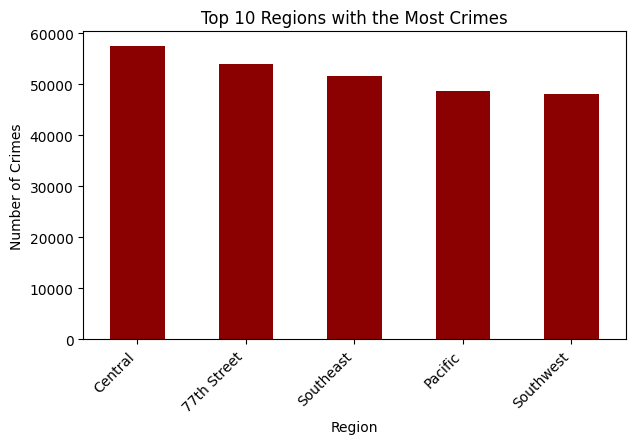

In [ ]:
top_regions = df['AREA NAME'].value_counts().nlargest(5)

print("Top 5 Regions with the Most Crimes:")
print(top_regions)
# Assuming 'REGION' is the column containing information about regions in your DataFrame
# Replace 'REGION' with the actual column name if it's different in your dataset
top_regions = df['AREA NAME'].value_counts().nlargest(5)

# Plotting the data with dark red color
plt.figure(figsize=(7, 4))
top_regions.plot(kind='bar', color='#8B0000')
plt.title('Top 10 Regions with the Most Crimes')
plt.xlabel('Region')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


3.2 Are there any specific days of the week or months that show higher crime rates?

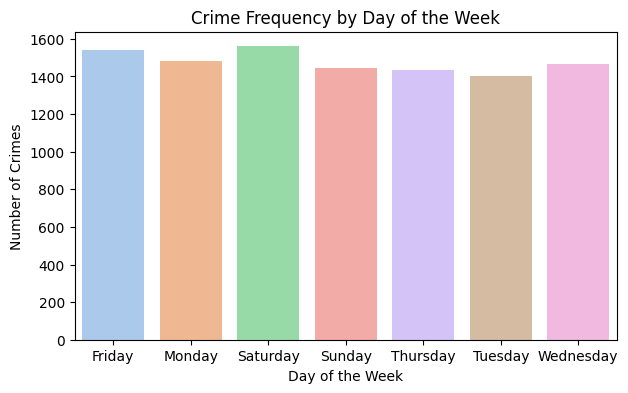

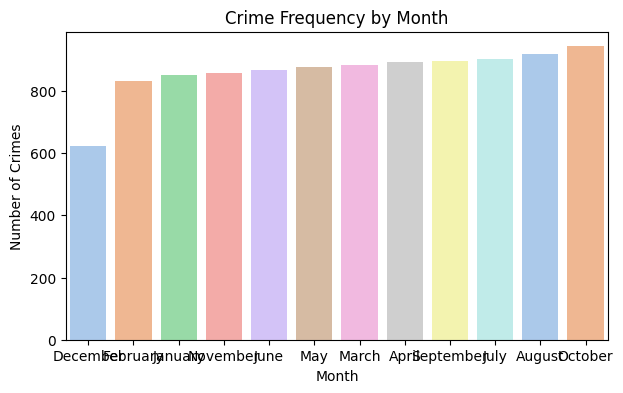

In [ ]:
# Convert the 'DATE OCC' column to a datetime object
import seaborn as sns
sampled_clean['DATE OCC'] = pd.to_datetime(sampled_clean['DATE OCC'])

# Extract the day of the week and month from the datetime column
sampled_clean['day_of_week'] = sampled_clean['DATE OCC'].dt.day_name()
sampled_clean['month'] = sampled_clean['DATE OCC'].dt.month_name()

# Count the occurrences of each day of the week and month
crime_counts_by_day = sampled_clean['day_of_week'].value_counts().sort_index()
crime_counts_by_month = sampled_clean['month'].value_counts().sort_values()

# Define a custom color palette
custom_palette = sns.color_palette("pastel")  # You can replace "pastel" with other palette names

# Plot the data for days of the week with the custom palette
plt.figure(figsize=(7, 4))
sns.barplot(x=crime_counts_by_day.index, y=crime_counts_by_day.values, palette=custom_palette)
plt.title('Crime Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.show()

# Plot the data for months with the custom palette
plt.figure(figsize=(7, 4))
sns.barplot(x=crime_counts_by_month.index, y=crime_counts_by_month.values, palette=custom_palette)
plt.title('Crime Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()



- Crime rates increase during the winter months, with January and February experiencing the highest frequencies, both surpassing 4,000 incidents.

- Conversely, the end of the year, specifically November, August, July, December, and October, witnesses markedly lower crime rates, each totaling fewer than 1,000 incidents.

- When considering days of the week, Friday, Saturday, and Wednesday emerge as peak periods for criminal activities, collectively registering over 3,500 incidents.

- In contrast, Tuesday consistently maintains the lowest crime frequency among weekdays.Certainly! Here's the revised version with "increase":

- Crime rates increase during the winter months, with January and February experiencing the highest frequencies, both surpassing 4,000 incidents.

- Conversely, the end of the year, specifically November, August, July, December, and October, witnesses markedly lower crime rates, each totaling fewer than 1,000 incidents.

- When considering days of the week, Friday, Saturday, and Wednesday emerge as peak periods for criminal activities, collectively registering over 3,500 incidents.

- In contrast, Tuesday consistently maintains the lowest crime frequency among weekdays.


3.3 Which areas within Los Angeles experience the highest number of specific types of crimes, such as theft or assault?

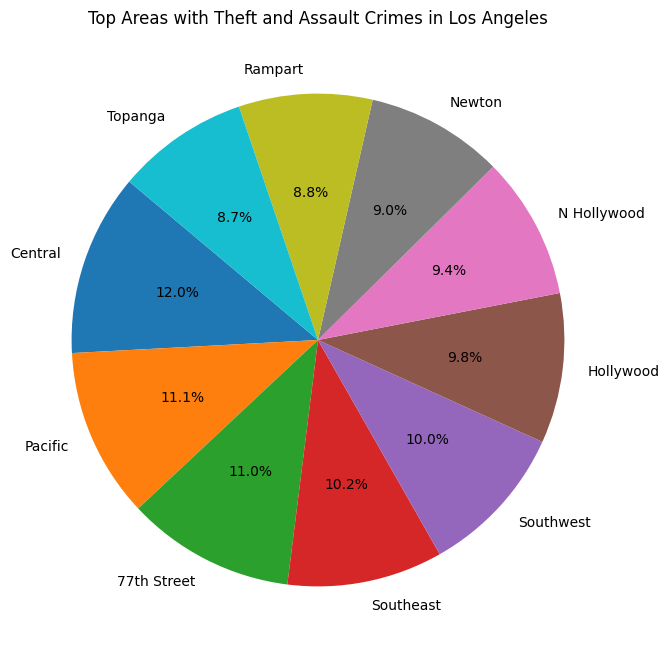

In [ ]:
# Filter for theft and assault related crimes
theft_assault_data = sampled_clean[sampled_clean['Crm Cd Desc'].str.contains('THEFT|ASSAULT', case=False, na=False)]

# Group by 'AREA NAME' and count the occurrences
area_crime_counts = theft_assault_data['AREA NAME'].value_counts()

# Get the top N areas with the highest number of theft and assault crimes
top_areas = area_crime_counts.head(10)

# Create a pie chart
plt.figure(figsize=(10, 8))
top_areas.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top Areas with Theft and Assault Crimes in Los Angeles')
plt.ylabel('')  # Hide y-label as it is not needed in pie charts
plt.show()


3.4 What is the distribution of crime types in different neighborhoods?

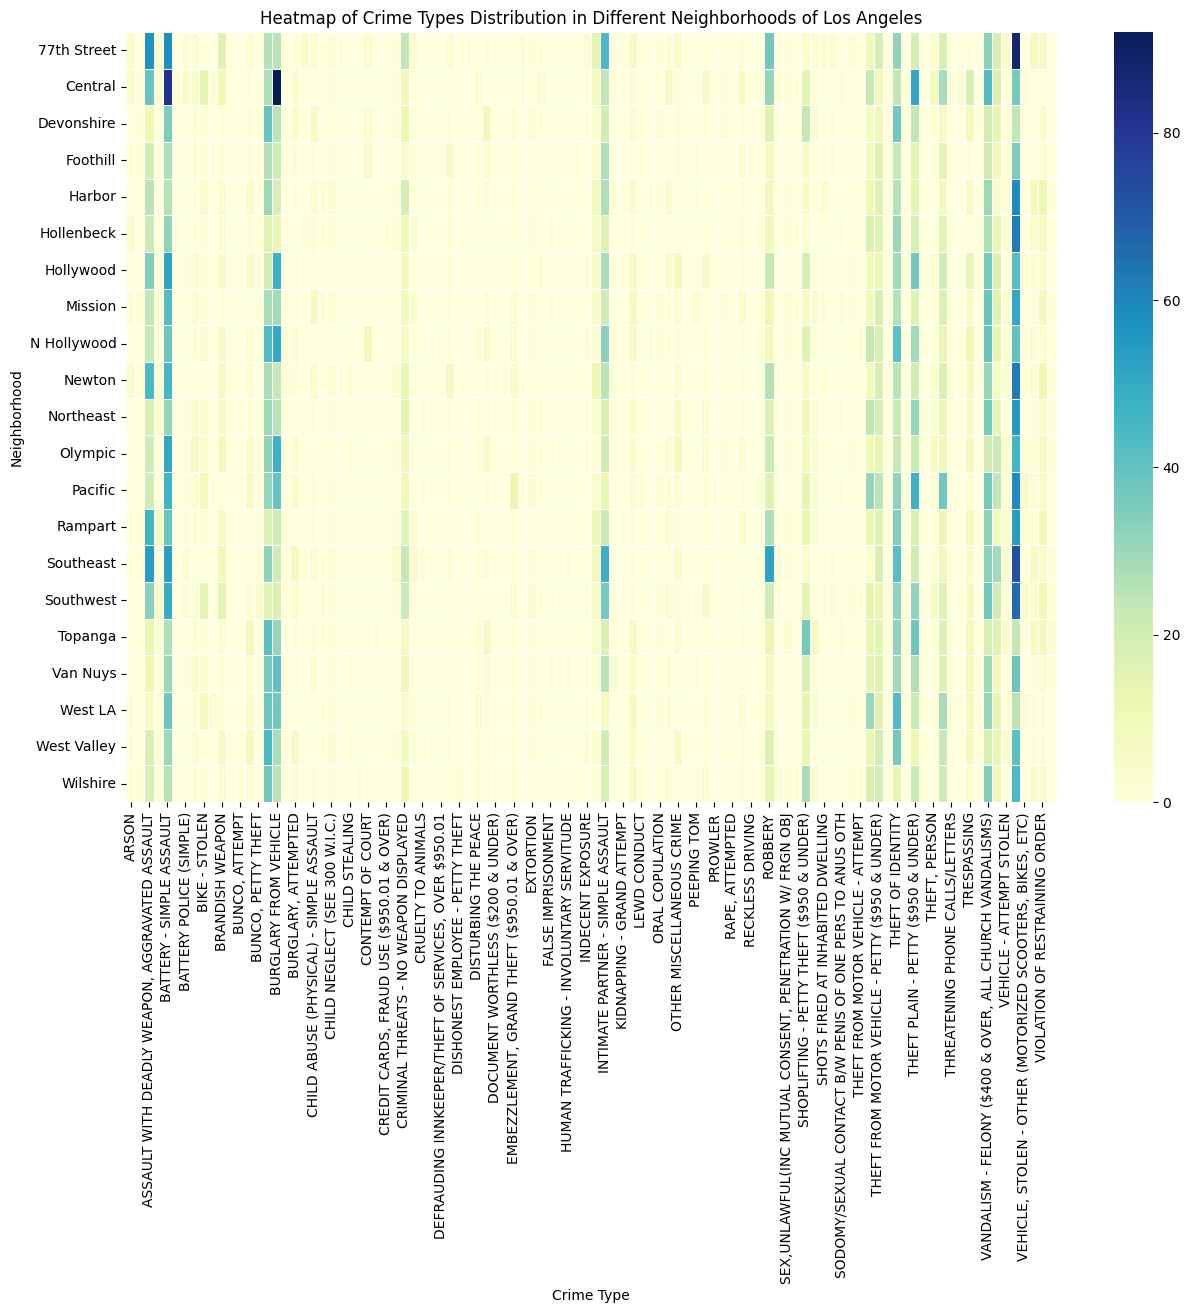

In [ ]:
# Create a pivot table with 'AREA NAME' as rows, 'Crm Cd Desc' as columns, and counts as values
crime_pivot = sampled_clean.pivot_table(index='AREA NAME', columns='Crm Cd Desc', aggfunc='size', fill_value=0)

# Use seaborn to create a heatmap
plt.figure(figsize=(15, 10))  # Adjust the figure size as necessary
sns.heatmap(crime_pivot, annot=False, cmap='YlGnBu', linewidths=.5)

# Add titles and labels as necessary
plt.title('Heatmap of Crime Types Distribution in Different Neighborhoods of Los Angeles')
plt.xlabel('Crime Type')
plt.ylabel('Neighborhood')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()


3.5 How do crime rates compare across various victim demographics (age and gender)?

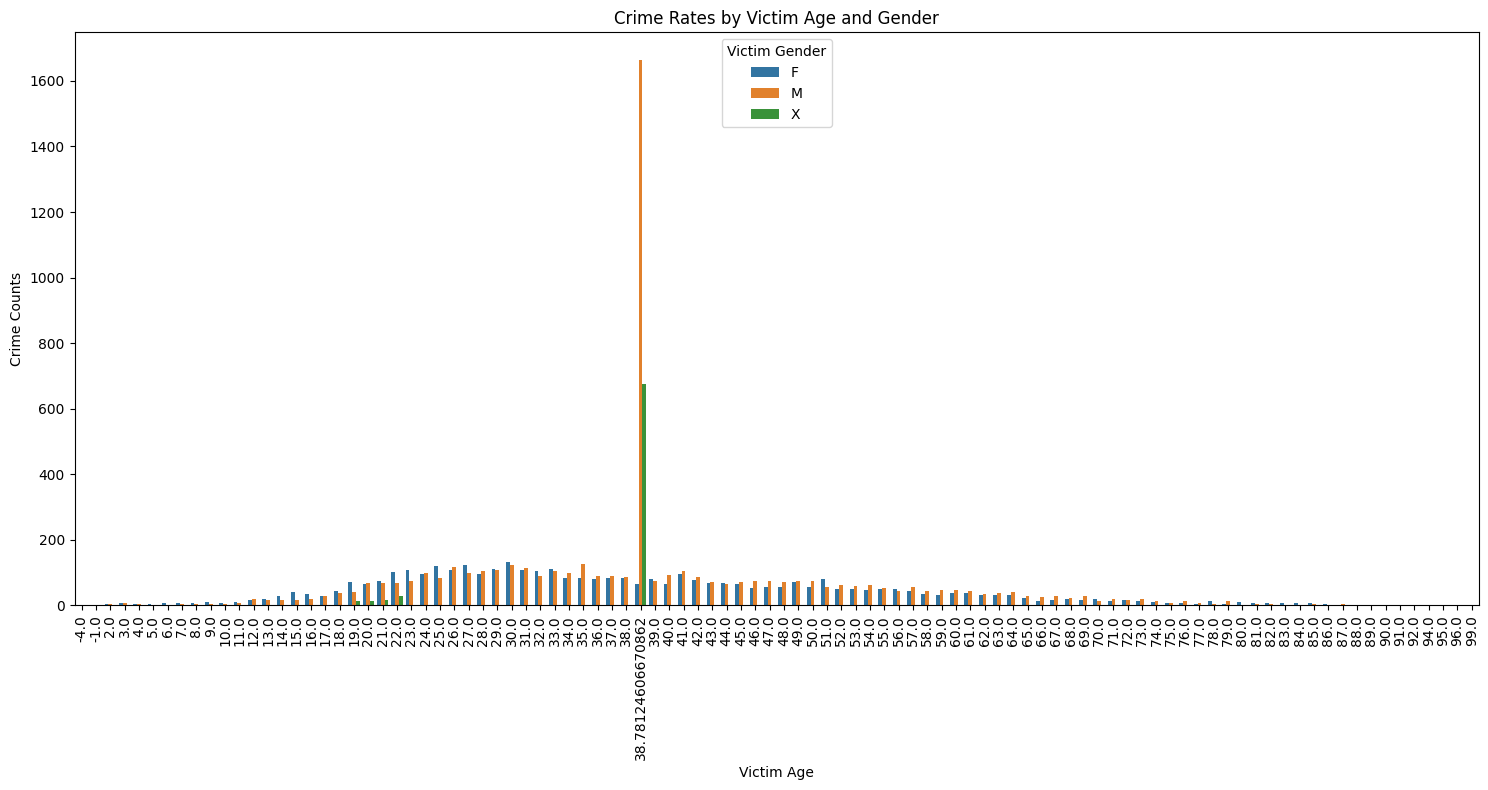

In [ ]:
# Group data by 'Vict Age' and 'Vict Sex', then count occurrences
crime_by_demographics = sampled_clean.groupby(['Vict Age', 'Vict Sex']).size().reset_index(name='Counts')

# Create a bar plot to show the count of crimes for each age group and gender
plt.figure(figsize=(15, 8))
age_gender_plot = sns.barplot(x='Vict Age', y='Counts', hue='Vict Sex', data=crime_by_demographics)

# Improve the aesthetics of the plot
age_gender_plot.set_xticklabels(age_gender_plot.get_xticklabels(), rotation=90)
plt.title('Crime Rates by Victim Age and Gender')
plt.xlabel('Victim Age')
plt.ylabel('Crime Counts')
plt.legend(title='Victim Gender')
plt.tight_layout()
plt.show()

3.6 Can we identify any trends in crime rates over the years provided in the dataset?

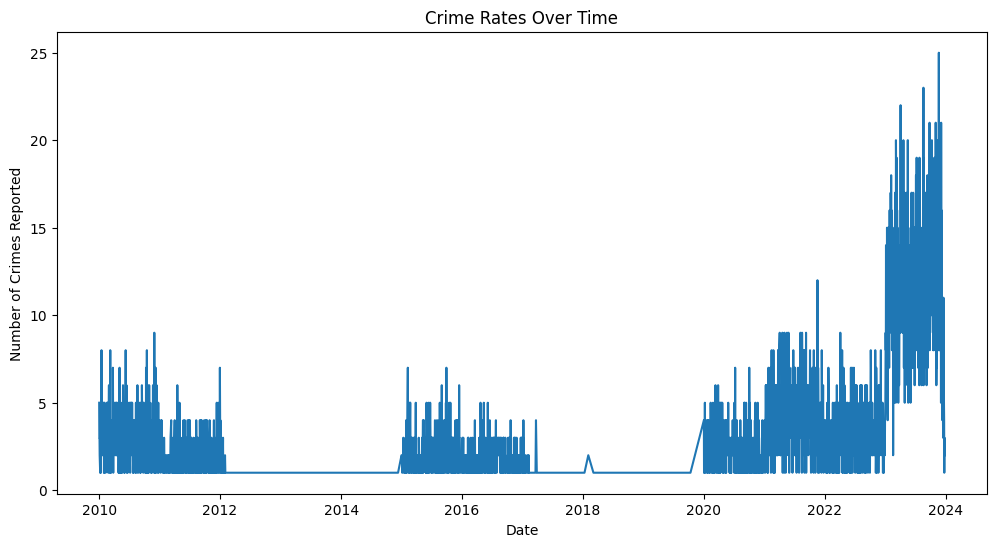

In [ ]:
# Convert the 'Date Rptd' column to datetime format
sampled_clean['Date Rptd'] = pd.to_datetime(sampled_clean['Date Rptd'])

# Group the data by date and count the number of crimes reported on each date
crime_counts_per_date = sampled_clean.groupby(sampled_clean['Date Rptd']).size()

# Plot the time series
plt.figure(figsize=(12, 6))
sns.lineplot(x=crime_counts_per_date.index, y=crime_counts_per_date.values)
plt.title('Crime Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes Reported')
plt.show()

3.7 Is there a relationship between the type of weapon used and the location or time of the crime?

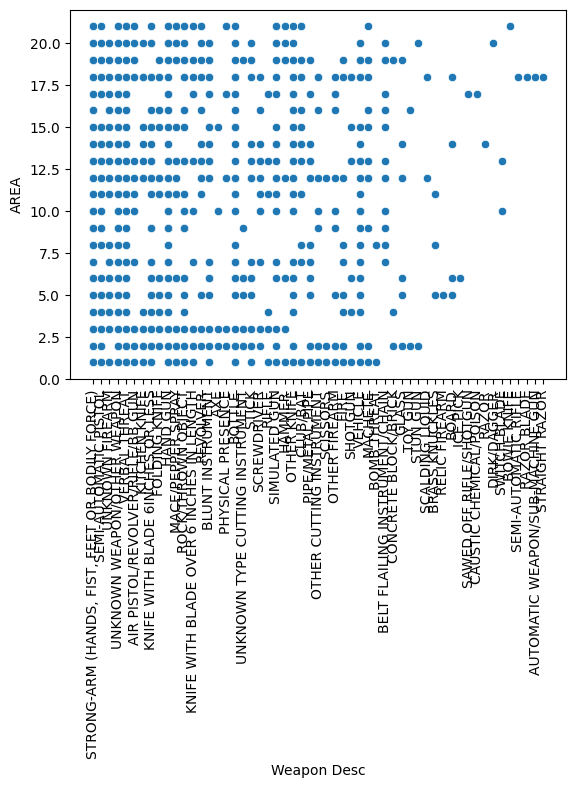

<Figure size 4000x2500 with 0 Axes>

In [ ]:
#weapon & area

sea.scatterplot(x="Weapon Desc", y="AREA", data=sampled_clean)
plt.xlabel("Weapon Desc")
plt.ylabel("AREA")
plt.xticks(rotation=90)
plt.figure(figsize=(40, 25))

plt.show()

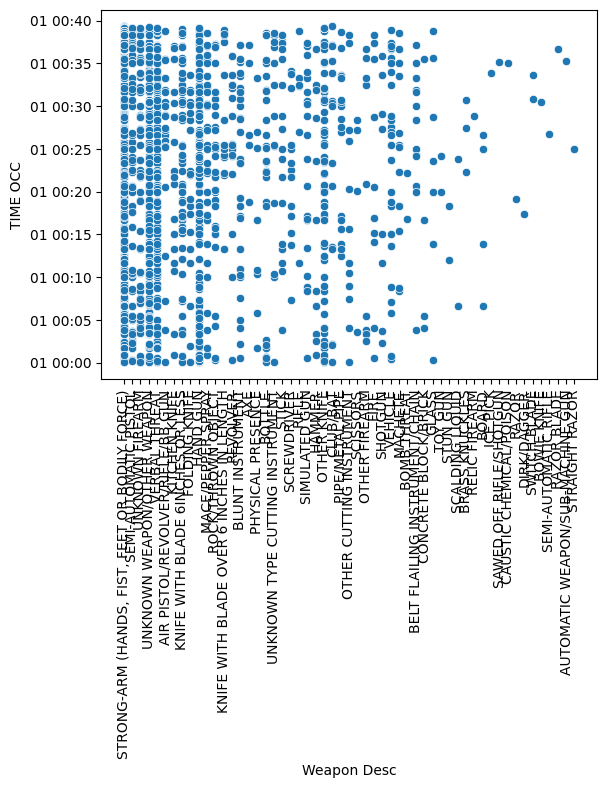

<Figure size 2000x2500 with 0 Axes>

In [ ]:
#weapon & time

import seaborn as sns

sns.scatterplot(x="Weapon Desc", y="TIME OCC", data=sampled_clean)
plt.xlabel("Weapon Desc")
plt.ylabel("TIME OCC")
plt.xticks(rotation=90)
plt.figure(figsize=(20, 25))

plt.show()

3.8 What are the most common crime reported?

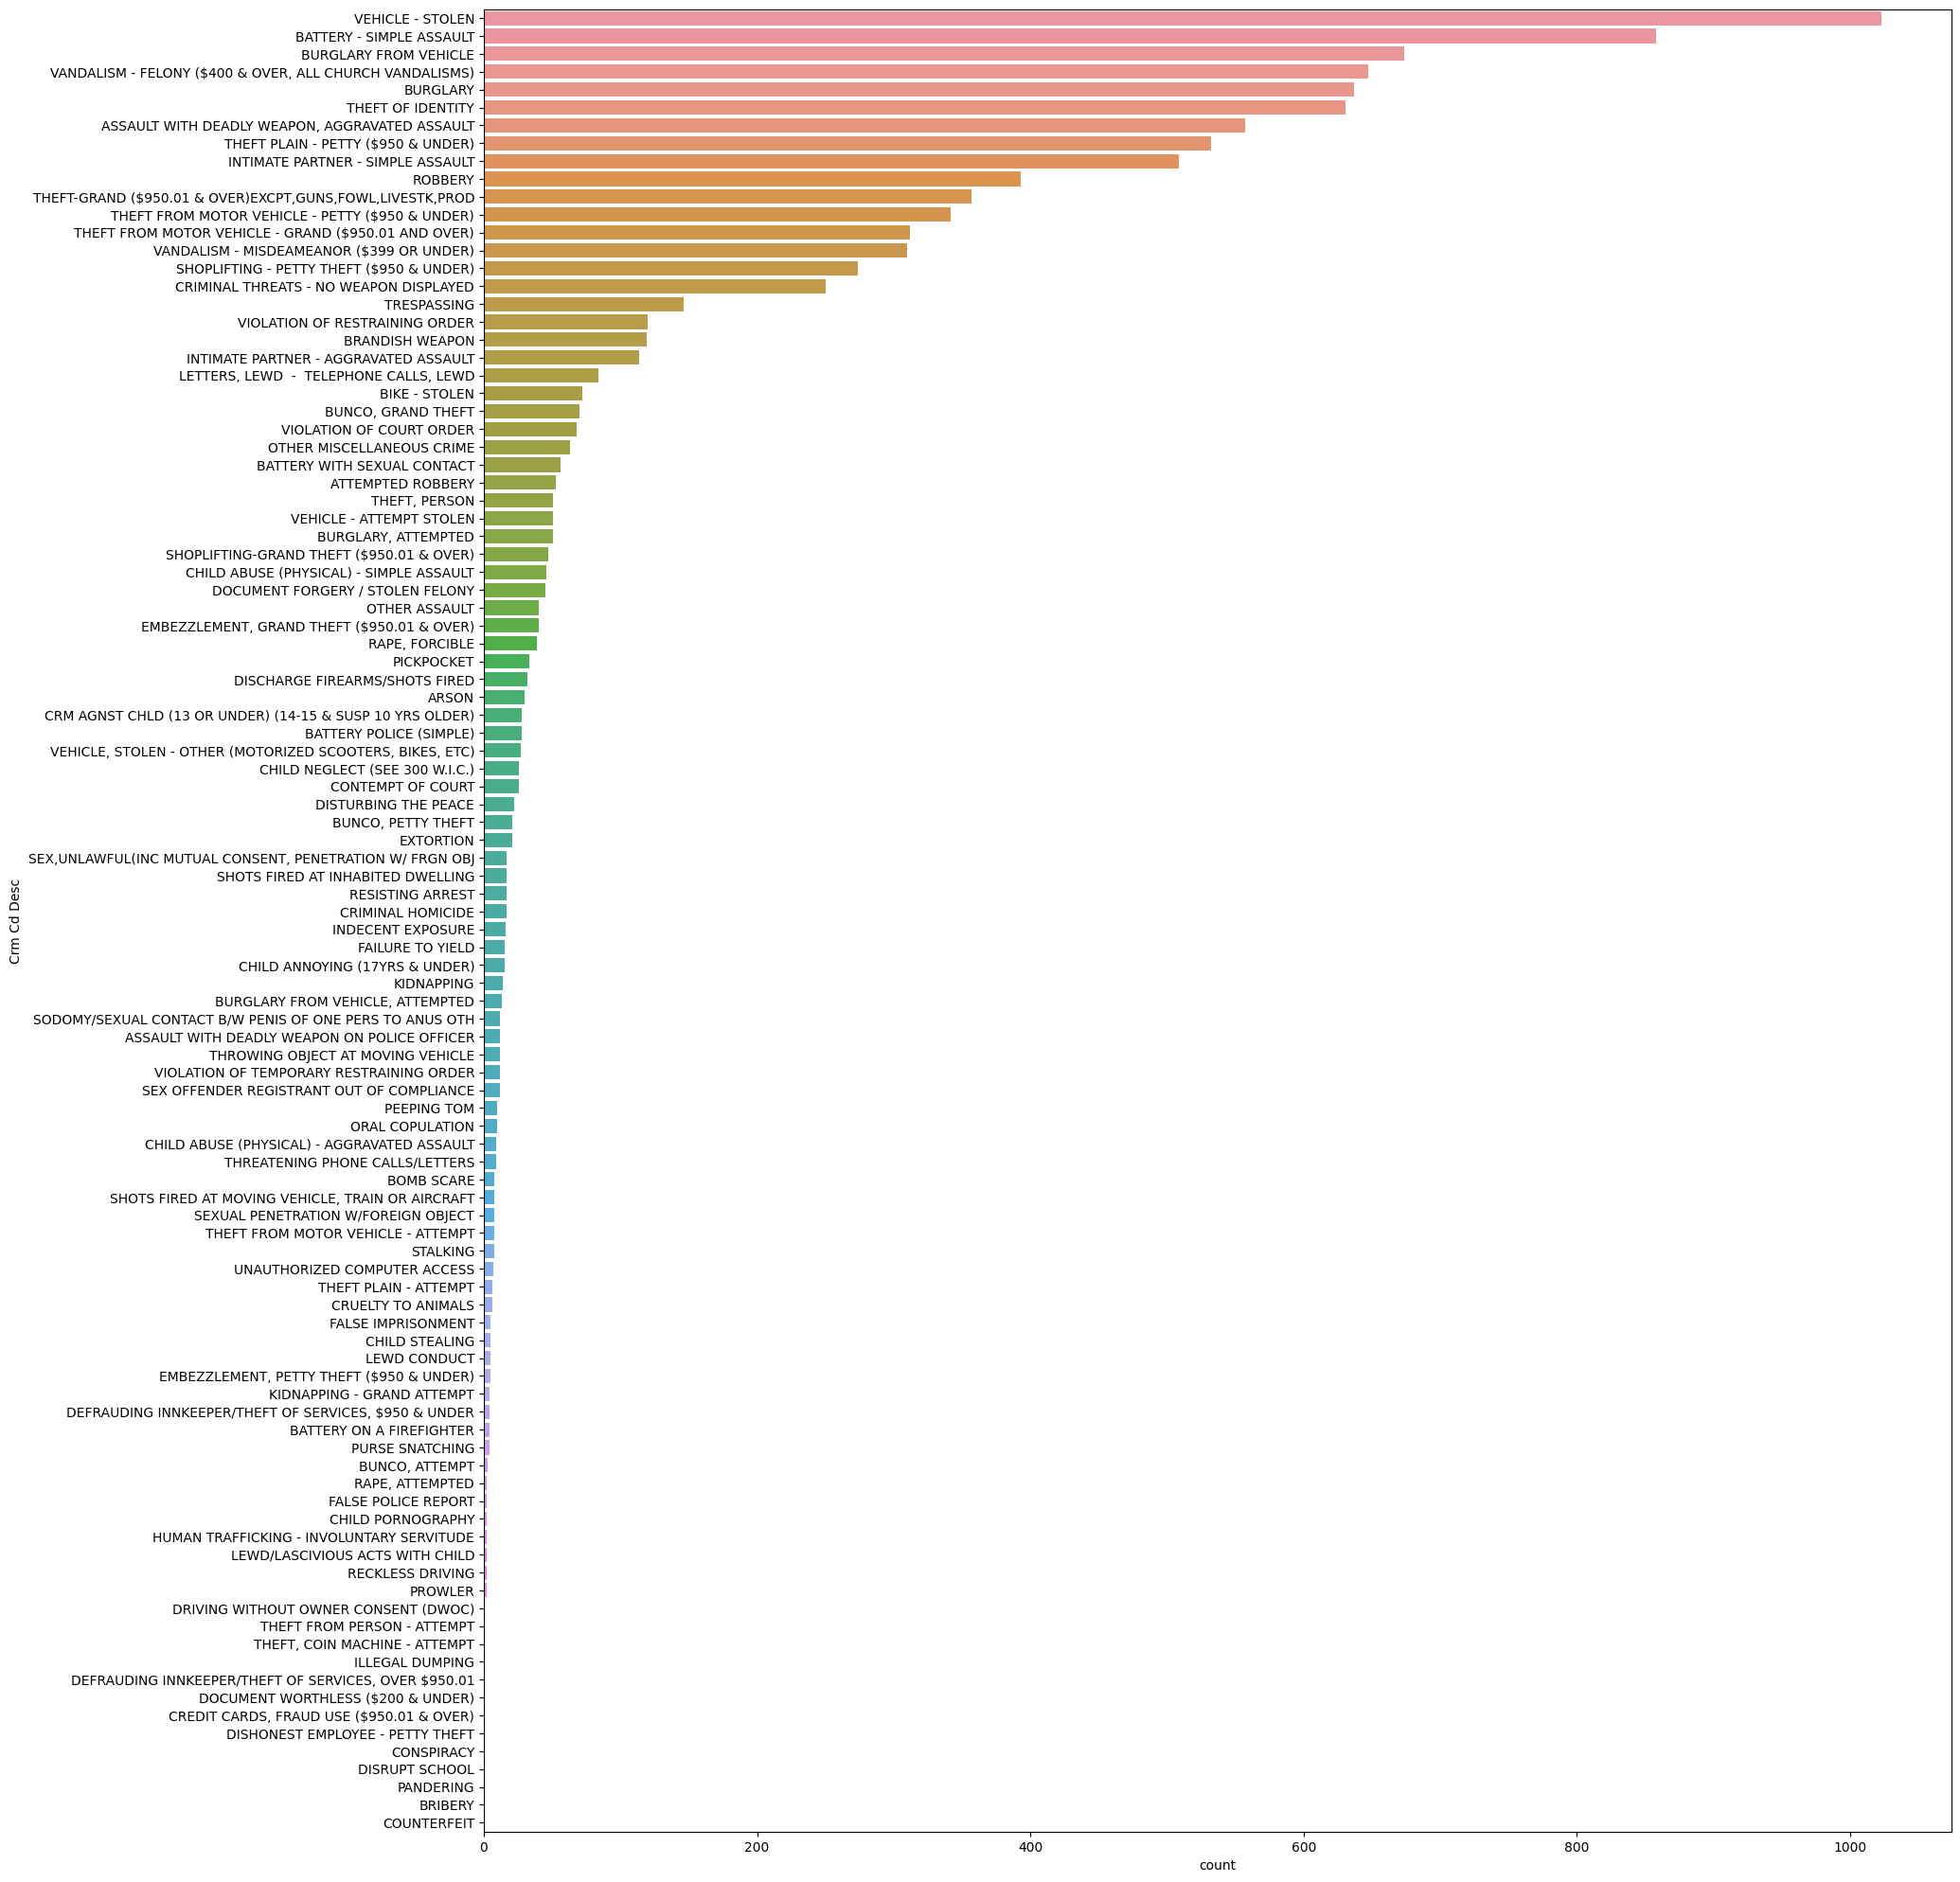

In [ ]:
type_order = sampled_clean['Crm Cd Desc'].value_counts().index
plt.figure(figsize=(20,25));
sea.countplot(data=sampled_clean, y='Crm Cd Desc', order=type_order);


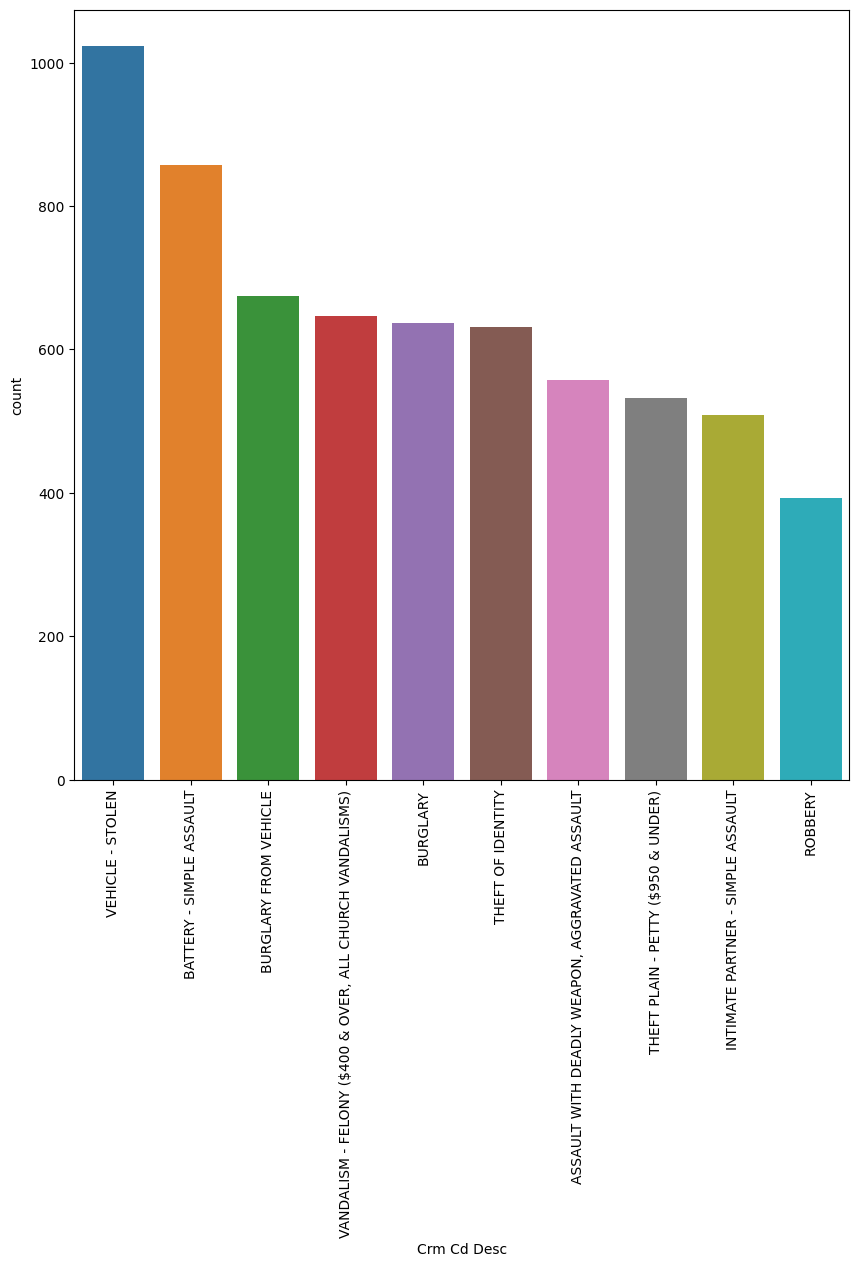

In [ ]:
type_order = sampled_clean['Crm Cd Desc'].value_counts().head(10).index
plt.figure(figsize=(10,10));
sea.countplot(data=sampled_clean, x='Crm Cd Desc', order=type_order);
plt.xticks(rotation=90);

3.9 Can we predict future crime hotspots based on historical data of crime locations?

In [ ]:
sampled_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10339 entries, 150067 to 565079
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date Rptd       10339 non-null  datetime64[ns]
 1   DATE OCC        10339 non-null  datetime64[ns]
 2   TIME OCC        10339 non-null  datetime64[ns]
 3   AREA            10339 non-null  int64         
 4   AREA NAME       10339 non-null  object        
 5   Part 1-2        10339 non-null  int64         
 6   Crm Cd          10339 non-null  int64         
 7   Crm Cd Desc     10339 non-null  object        
 8   Mocodes         10339 non-null  object        
 9   Vict Age        10339 non-null  float64       
 10  Vict Sex        10339 non-null  object        
 11  Vict Descent    10339 non-null  object        
 12  Premis Cd       10339 non-null  float64       
 13  Premis Desc     10339 non-null  object        
 14  Weapon Used Cd  10339 non-null  float64       
 

In [ ]:
X = sampled_clean.iloc[:, 6:]
Y = sampled_clean['AREA NAME']

In [ ]:
categorical_columns = [column for column in X.columns if X[column].dtype == 'object' ]

for column in categorical_columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

In [ ]:
X

Crm Cd  Crm Cd Desc  Mocodes   Vict Age  Vict Sex  Vict Descent  \
150067     668           42      871  38.781246         1             4   
278359     740           94      233  15.000000         2            13   
460141     354           84     4192  41.000000         1            12   
17841      664           14     2521  52.000000         1             2   
558687     210           70     3889  21.000000         2            13   
...        ...          ...      ...        ...       ...           ...   
317299     626           52     4899  35.000000         0             1   
170279     210           70     1445  73.000000         1            12   
848907     341           89     4360  38.781246         2            13   
360444     210           70     1155  59.000000         1             1   
565079     888           92     4744  41.000000         1             4   

        Premis Cd  Premis Desc  Weapon Used Cd  Weapon Desc  Status Desc  \
150067      203.0          130      361.675055           46            2   
278359      203.0          130      361.675055           46            0   
460141      501.0          158      361.675055           46            2   
17841       501.0          158      361.675055           46            2   
558687      418.0          167      109.000000           40            0   
...           ...          ...             ...          ...          ...   
317299      511.0          148      400.000000           46            1   
170279      503.0           67      400.000000           46            2   
848907      405.0           30      361.675055           46            2   
360444      301.0           58      511.000000           54            2   
565079      501.0          158      361.675055           46            2   

        LOCATION      LAT       LON  
150067      3724  34.0247 -118.3089  
278359      2196  34.0327 -118.3002  
460141      4169  34.0313 -118.3316  
17841       3766  34.0182 -118.3329  
558687      2486  34.0349 -118.3046  
...          ...      ...       ...  
317299      2759  33.9305 -118.2363  
170279      3951  33.9311 -118.2664  
848907      6265  33.9601 -118.2651  
360444      6090  33.9164 -118.2894  
565079      2726  33.9465 -118.2766  

[10339 rows x 14 columns]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy)


0.9584139264990329


3.10  an we predict the unkown gender of the victims using our known gender crime cases?

In [ ]:
ML_df = sampled_clean.copy()

In [ ]:
ML_df.head()

Date Rptd   DATE OCC            TIME OCC  AREA  AREA NAME  Part 1-2  \
150067 2012-10-16 2011-11-09 1970-01-01 00:20:00     3  Southwest         2   
278359 2016-02-09 2016-02-09 1970-01-01 00:38:50     3  Southwest         2   
460141 2022-08-12 2022-08-06 1970-01-01 00:25:10     3  Southwest         2   
17841  2020-06-28 2020-06-27 1970-01-01 00:26:40     3  Southwest         2   
558687 2022-12-11 2022-12-10 1970-01-01 00:37:05     3  Southwest         1   

        Crm Cd                                        Crm Cd Desc  \
150067     668         EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)   
278359     740  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...   
460141     354                                  THEFT OF IDENTITY   
17841      664                                 BUNCO, PETTY THEFT   
558687     210                                            ROBBERY   

                                                  Mocodes   Vict Age Vict Sex  \
150067                                               0344  38.781246        M   
278359                           0311 1402 0906 1816 0329  15.000000        X   
460141                                          1822 0100  41.000000        M   
17841                                                0701  52.000000        M   
558687  1419 1407 1402 0334 0355 0344 0913 2018 0302 0342  21.000000        X   

       Vict Descent  Premis Cd             Premis Desc  Weapon Used Cd  \
150067            H      203.0          OTHER BUSINESS      361.675055   
278359            X      203.0          OTHER BUSINESS      361.675055   
460141            W      501.0  SINGLE FAMILY DWELLING      361.675055   
17841             C      501.0  SINGLE FAMILY DWELLING      361.675055   
558687            X      418.0                  STREET      109.000000   

                                           Weapon Desc   Status Desc  \
150067  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   Invest Cont   
278359  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)  Adult Arrest   
460141  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   Invest Cont   
17841   STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)   Invest Cont   
558687                           SEMI-AUTOMATIC PISTOL  Adult Arrest   

                                       LOCATION      LAT       LON  
150067  3500 S  WESTERN                      AV  34.0247 -118.3089  
278359  1700 W  ADAMS                        BL  34.0327 -118.3002  
460141  4200 W  MONT CLAIR                   ST  34.0313 -118.3316  
17841   3600 S  NORTON                       AV  34.0182 -118.3329  
558687  1900 W  ADAMS                        BL  34.0349 -118.3046

In [ ]:
ML_df['Vict Sex'].unique()

array(['M', 'X', 'F'], dtype=object)

In [ ]:
categorical_columns = [column for column in ML_df.columns if ML_df[column].dtype == 'object' ]

for column in categorical_columns:
    le = LabelEncoder()
    ML_df[column] = le.fit_transform(ML_df[column])

In [ ]:
ML_df.head()

Date Rptd   DATE OCC            TIME OCC  AREA  AREA NAME  Part 1-2  \
150067 2012-10-16 2011-11-09 1970-01-01 00:20:00     3         15         2   
278359 2016-02-09 2016-02-09 1970-01-01 00:38:50     3         15         2   
460141 2022-08-12 2022-08-06 1970-01-01 00:25:10     3         15         2   
17841  2020-06-28 2020-06-27 1970-01-01 00:26:40     3         15         2   
558687 2022-12-11 2022-12-10 1970-01-01 00:37:05     3         15         1   

        Crm Cd  Crm Cd Desc  Mocodes   Vict Age  Vict Sex  Vict Descent  \
150067     668           42      871  38.781246         1             4   
278359     740           94      233  15.000000         2            13   
460141     354           84     4192  41.000000         1            12   
17841      664           14     2521  52.000000         1             2   
558687     210           70     3889  21.000000         2            13   

        Premis Cd  Premis Desc  Weapon Used Cd  Weapon Desc  Status Desc  \
150067      203.0          130      361.675055           46            2   
278359      203.0          130      361.675055           46            0   
460141      501.0          158      361.675055           46            2   
17841       501.0          158      361.675055           46            2   
558687      418.0          167      109.000000           40            0   

        LOCATION      LAT       LON  
150067      3724  34.0247 -118.3089  
278359      2196  34.0327 -118.3002  
460141      4169  34.0313 -118.3316  
17841       3766  34.0182 -118.3329  
558687      2486  34.0349 -118.3046

In [ ]:
ML_df['Vict Sex'].unique()

array([1, 2, 0])

In [ ]:
ML_df['Vict Sex'] = ML_df['Vict Sex'].replace(2,np.NAN)

In [ ]:
ML_df

Date Rptd   DATE OCC            TIME OCC  AREA  AREA NAME  Part 1-2  \
150067 2012-10-16 2011-11-09 1970-01-01 00:20:00     3         15         2   
278359 2016-02-09 2016-02-09 1970-01-01 00:38:50     3         15         2   
460141 2022-08-12 2022-08-06 1970-01-01 00:25:10     3         15         2   
17841  2020-06-28 2020-06-27 1970-01-01 00:26:40     3         15         2   
558687 2022-12-11 2022-12-10 1970-01-01 00:37:05     3         15         1   
...           ...        ...                 ...   ...        ...       ...   
317299 2016-11-29 2016-11-29 1970-01-01 00:37:10    18         14         2   
170279 2011-10-06 2011-10-06 1970-01-01 00:08:30    18         14         1   
848907 2023-03-25 2023-03-25 1970-01-01 00:25:11    18         14         1   
360444 2015-09-26 2015-09-26 1970-01-01 00:36:40    18         14         1   
565079 2023-11-10 2023-11-10 1970-01-01 00:25:00    18         14         2   

        Crm Cd  Crm Cd Desc  Mocodes   Vict Age  Vict Sex  Vict Descent  \
150067     668           42      871  38.781246       1.0             4   
278359     740           94      233  15.000000       NaN            13   
460141     354           84     4192  41.000000       1.0            12   
17841      664           14     2521  52.000000       1.0             2   
558687     210           70     3889  21.000000       NaN            13   
...        ...          ...      ...        ...       ...           ...   
317299     626           52     4899  35.000000       0.0             1   
170279     210           70     1445  73.000000       1.0            12   
848907     341           89     4360  38.781246       NaN            13   
360444     210           70     1155  59.000000       1.0             1   
565079     888           92     4744  41.000000       1.0             4   

        Premis Cd  Premis Desc  Weapon Used Cd  Weapon Desc  Status Desc  \
150067      203.0          130      361.675055           46            2   
278359      203.0          130      361.675055           46            0   
460141      501.0          158      361.675055           46            2   
17841       501.0          158      361.675055           46            2   
558687      418.0          167      109.000000           40            0   
...           ...          ...             ...          ...          ...   
317299      511.0          148      400.000000           46            1   
170279      503.0           67      400.000000           46            2   
848907      405.0           30      361.675055           46            2   
360444      301.0           58      511.000000           54            2   
565079      501.0          158      361.675055           46            2   

        LOCATION      LAT       LON  
150067      3724  34.0247 -118.3089  
278359      2196  34.0327 -118.3002  
460141      4169  34.0313 -118.3316  
17841       3766  34.0182 -118.3329  
558687      2486  34.0349 -118.3046  
...          ...      ...       ...  
317299      2759  33.9305 -118.2363  
170279      3951  33.9311 -118.2664  
848907      6265  33.9601 -118.2651  
360444      6090  33.9164 -118.2894  
565079      2726  33.9465 -118.2766  

[10339 rows x 20 columns]

In [ ]:
df_known = ML_df.dropna(subset=['Vict Sex'])
df_unknown = ML_df[ML_df['Vict Sex'].isnull()]

features = ['AREA',	'AREA NAME',	'Part 1-2',	'Crm Cd',	'Crm Cd Desc',	'Mocodes',	'Vict Age',	'Vict Descent',	'Premis Cd',	'Premis Desc',	'Weapon Used Cd',	'Weapon Desc',	'Status Desc','LOCATION'	,'LAT',	'LON']

X_train, X_test, y_train, y_test = train_test_split(df_known[features], df_known['Vict Sex'], test_size=0.2, random_state=42)

model = RandomForestClassifier()

model.fit(X_train, y_train)

predictions = model.predict(df_unknown[features])

ML_df.loc[ML_df['Vict Sex'].isnull(), 'Vict Sex'] = predictions


In [ ]:
ML_df.sample(5)

Date Rptd   DATE OCC            TIME OCC  AREA  AREA NAME  Part 1-2  \
417319 2016-07-18 2016-07-15 1970-01-01 00:35:20    19          7         2   
782370 2023-09-08 2023-09-08 1970-01-01 00:13:40    10         19         2   
630997 2022-11-18 2022-11-18 1970-01-01 00:32:10     1          1         1   
156421 2010-12-27 2010-12-27 1970-01-01 00:26:40    15          8         1   
194526 2010-04-02 2010-04-01 1970-01-01 00:35:00     9         17         1   

        Crm Cd  Crm Cd Desc  Mocodes   Vict Age  Vict Sex  Vict Descent  \
417319     354           84       50  26.000000       0.0             8   
782370     745           95     5331  31.000000       0.0             1   
630997     442           74      871  38.781246       1.0            13   
156421     420           82      871  38.781246       1.0             4   
194526     440           86     1150  46.000000       1.0            12   

        Premis Cd  Premis Desc  Weapon Used Cd  Weapon Desc  Status Desc  \
417319      101.0          167      361.675055           46            0   
782370      101.0          167      361.675055           46            2   
630997      404.0           42      361.675055           46            2   
156421      101.0          167      361.675055           46            2   
194526      108.0          137      361.675055           46            2   

        LOCATION      LAT       LON  
417319      7163  34.2214 -118.4721  
782370      6813  34.1722 -118.5220  
630997      5580  34.0483 -118.2631  
156421      5381  34.1913 -118.4041  
194526      1340  34.1504 -118.4181

In [ ]:
ML_df['Vict Sex'].unique()

array([1., 0.])

# 4. Conclusions

In conclusion, our exploration into predictive modeling for crime based on area has revealed that the Random Forest machine learning model stands out as the most effective choice within the scope of our dataset. Through rigorous evaluation, it has consistently demonstrated high accuracy and maintained a low margin of error. This robust performance attests to the model's capability to discern patterns and relationships within the data, making it a reliable tool for predicting crime occurrences across different areas. As we move forward, the success of the Random Forest model encourages confidence in its practical applicability and its potential to contribute meaningfully to our understanding and management of crime trends in diverse geographical regions.